# Import necessary module

In [860]:
import pandas as pd
#from pandas import datetools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.style.use('ggplot')

# Reading the file

In [861]:
infile=r"C:\Graduate Courses\Fall 2019\STA 5703\Assignment_3\Maize_data3.csv"
df=pd.read_csv(infile, sep=",")

C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

In [862]:
df.head()

,Geno_Code,pop,m1,m2,m3,m4,m5,m6,m7,m8,...,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389,Entry,DtoA
0,Z001E0001,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,75.54
1,Z001E0002,1.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.0,76.91
2,Z001E0003,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,75.26
3,Z001E0004,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.0,73.69
4,Z001E0005,1.0,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.0,79.24


In [863]:
df=df.dropna(how='any')

In [864]:
len(df)

2187

## Male flowering time distribution

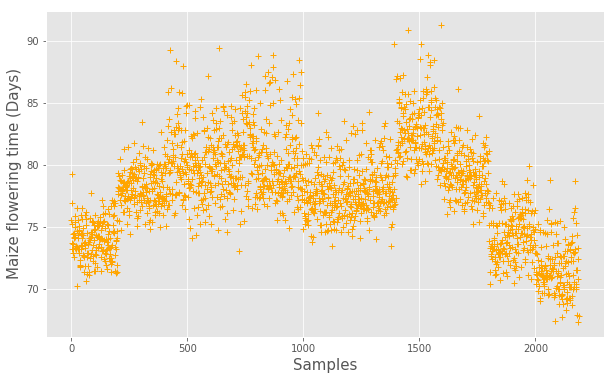

In [865]:
fig,ax=plt.subplots(figsize=(10,6))

ax.plot(df['DtoA'],'+',color='orange')

plt.ylabel('Maize flowering time (Days)',size='15')

plt.xlabel('Samples',size='15')

plt.grid(True)

In [866]:
df=df.drop(['Geno_Code','pop','Entry'],axis=1)
df.replace(' ', np.nan, inplace=True)
df=df.dropna(how='any')
df=df.apply(pd.to_numeric)

In [867]:
scaler = StandardScaler(with_mean=False)

## Linear Regression with 5 fold cross validation

In [868]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

X_train=df.drop(['DtoA'],axis=1)

Xs_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

Y_train=df['DtoA'].values.reshape(-1,1)

lin_reg=LinearRegression()

MSEs=cross_val_score(lin_reg,Xs_train,Y_train,scoring='neg_mean_squared_error',cv=5)

mean_MSE=np.mean(MSEs)

print(mean_MSE)

-37.635114082080385


## Ridge Regression

In [914]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib

In [922]:
alphas = [0.25e5,0.5e5,0.75e5,1e5,1.25e5,1.5e5,1.75e5,2e5,2.25e5,2.5e5,2.75e5,3e5,3.25e5,3.5e5,3.75e5,4e5]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xs_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

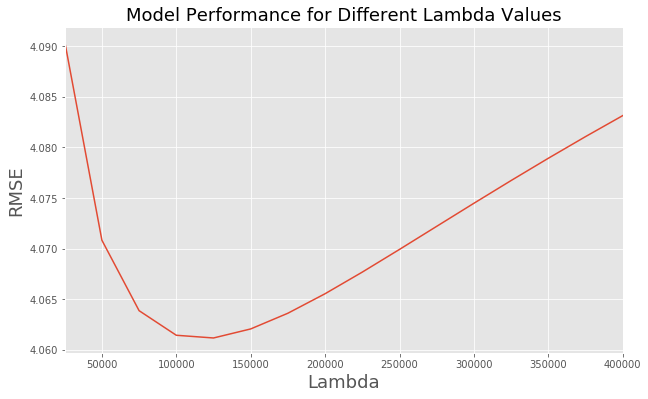

In [929]:
plt.figure(figsize=(10,6))
cv_ridge.plot()
plt.xlabel("Lambda",size="18")
plt.ylabel("RMSE",size="18")
plt.title("Model Performance for Different Lambda Values",size="18")
plt.show()

### Shrinkage effect on the Coefficients

In [913]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(Xs_train, Y_train)
ridge_df = pd.DataFrame({'variable': list(Xs_train.columns), 'estimate': list((ridge_reg.coef_)[0])})

C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.55162e-17): result may not be accurate.
  overwrite_a=False)


In [915]:
# initialize
alphas = [0.1, 1, 100,1000,10000,0.25e5,0.5e5,0.75e5,1e5,1.25e5,1.5e5]
ridge_train_pred = []
#ridge_test_pred = []

# iterate lambdas
for alpha in alphas:
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(Xs_train, Y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = list((ridge_reg.coef_)[0])
    # prediction
    ridge_train_pred.append(ridge_reg.predict(Xs_train))
    #ridge_test_pred.append(ridge_reg.predict(X_test))


In [916]:
ridge_df.head()

,variable,estimate,estimate0.1,estimate1,estimate100,estimate1000,estimate10000,estimate25000.0,estimate50000.0,estimate75000.0,estimate100000.0,estimate125000.0,estimate150000.0
0,m1,-0.035248,-0.035073,-0.033701,-0.002245,0.000625,0.000098,0.000268,0.000385,0.000421,0.000429,0.000424,0.000415
1,m2,-0.023595,-0.023507,-0.022841,-0.000391,0.000896,0.000125,0.000278,0.000390,0.000424,0.000431,0.000426,0.000417
2,m3,-0.010484,-0.010493,-0.010622,0.001696,0.001202,0.000155,0.000289,0.000395,0.000428,0.000434,0.000429,0.000419
3,m4,0.001171,0.001075,0.000239,0.003552,0.001474,0.000181,0.000299,0.000400,0.000431,0.000436,0.000430,0.000420
4,m5,0.012826,0.012644,0.011102,0.005407,0.001746,0.000208,0.000309,0.000405,0.000434,0.000438,0.000432,0.000422


In [917]:
# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

In [918]:
ridge_df

variable,1,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,estimate,-0.035248,-0.023595,-0.010484,0.001171,0.012826,0.025939,0.037596,0.049252,0.062366,...,-0.022844,-0.042407,-0.061963,-0.067462,-0.068561,-0.068561,-0.068561,-0.068561,-0.068561,-0.068561
1,estimate0.1,-0.035073,-0.023507,-0.010493,0.001075,0.012644,0.025659,0.037229,0.048799,0.061816,...,-0.022975,-0.042152,-0.061322,-0.066587,-0.067639,-0.067639,-0.067639,-0.067639,-0.067639,-0.067639
2,estimate1,-0.033701,-0.022841,-0.010622,0.000239,0.011102,0.023322,0.034186,0.045049,0.057271,...,-0.023827,-0.040042,-0.056252,-0.059782,-0.060487,-0.060487,-0.060487,-0.060487,-0.060487,-0.060487
3,estimate100,-0.002245,-0.000391,0.001696,0.003552,0.005407,0.007494,0.009350,0.011205,0.013292,...,-0.012786,-0.013233,-0.013679,-0.012990,-0.012852,-0.012852,-0.012852,-0.012852,-0.012852,-0.012852
4,estimate1000,0.000625,0.000896,0.001202,0.001474,0.001746,0.002052,0.002324,0.002596,0.002902,...,0.000126,0.000006,-0.000113,-0.000118,-0.000119,-0.000119,-0.000119,-0.000119,-0.000119,-0.000119
5,estimate10000,0.000098,0.000125,0.000155,0.000181,0.000208,0.000238,0.000264,0.000291,0.000321,...,0.002379,0.002385,0.002391,0.002402,0.002404,0.002404,0.002404,0.002404,0.002404,0.002404
6,estimate25000.0,0.000268,0.000278,0.000289,0.000299,0.000309,0.000320,0.000331,0.000341,0.000352,...,0.001710,0.001715,0.001721,0.001728,0.001729,0.001729,0.001729,0.001729,0.001729,0.001729
7,estimate50000.0,0.000385,0.000390,0.000395,0.000400,0.000405,0.000411,0.000416,0.000420,0.000426,...,0.001113,0.001117,0.001120,0.001124,0.001125,0.001125,0.001125,0.001125,0.001125,0.001125
8,estimate75000.0,0.000421,0.000424,0.000428,0.000431,0.000434,0.000438,0.000441,0.000444,0.000448,...,0.000799,0.000802,0.000805,0.000807,0.000808,0.000808,0.000808,0.000808,0.000808,0.000808
9,estimate100000.0,0.000429,0.000431,0.000434,0.000436,0.000438,0.000441,0.000444,0.000446,0.000449,...,0.000608,0.000610,0.000612,0.000614,0.000615,0.000615,0.000615,0.000615,0.000615,0.000615


In [908]:
#ridge_df = ridge_df.set_index(1)

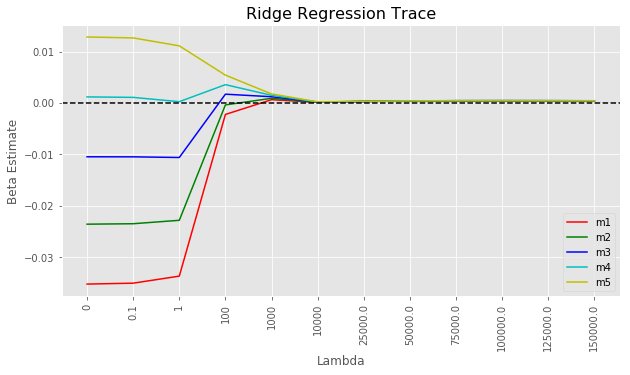

In [952]:
alphas = [0,0.1, 1, 100,1000,10000,0.25e5,0.5e5,0.75e5,1e5,1.25e5,1.5e5]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df['m1'], 'r', ridge_df.m2, 'g', ridge_df.m3, 'b', ridge_df.m4, 'c', ridge_df.m5, 'y')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xticklabels([""]+alphas)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['m1','m2','m3','m4','m5'])
plt.xticks(rotation='vertical')
ax.grid(True)

In [921]:
Xs_train.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,1.043207,1.043247,1.043287,1.043319,1.043347,1.043374,1.043395,1.043412,1.043426,1.043637,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
4,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [925]:
cv_ridge.min()

4.061165890214978

In [926]:
ridge_list=pd.DataFrame(ridge_df.iloc[10])
ridge_list=ridge_list.drop(ridge_list.index[0])

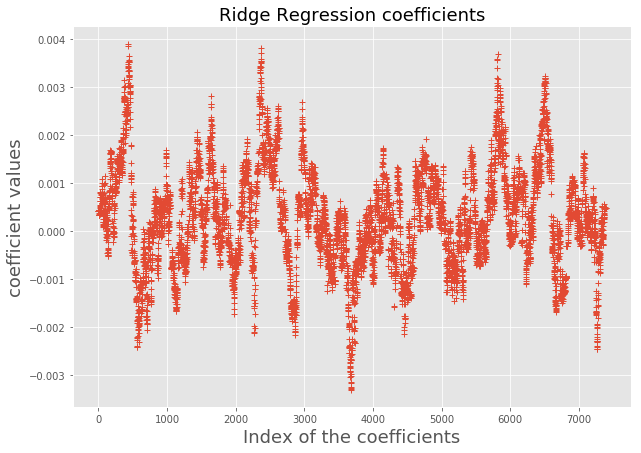

In [928]:
plt.figure(figsize=(10,7))
plt.plot(list(ridge_list[10]),'+')
plt.xlabel("Index of the coefficients",size="18")
plt.ylabel("coefficient values",size="18")
plt.title("Ridge Regression coefficients",size="18")

plt.show()

## LASSO Regression

In [988]:
Xs_train.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,1.043207,1.043247,1.043287,1.043319,1.043347,1.043374,1.043395,1.043412,1.043426,1.043637,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
4,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [989]:
alphas=np.linspace(0,1,100)

#alphas = [0,0.0002,0.0004,0.0006,0.0008,0.001,0.012,0.014]
#alphas = [0,0.01,0.02,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xs_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_Lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=1000)).mean() 
            for alpha in alphas]
cv_Lasso = pd.Series(cv_Lasso, index = alphas)

C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to

Text(0.5,1,'RMSE for Different Lambda values')

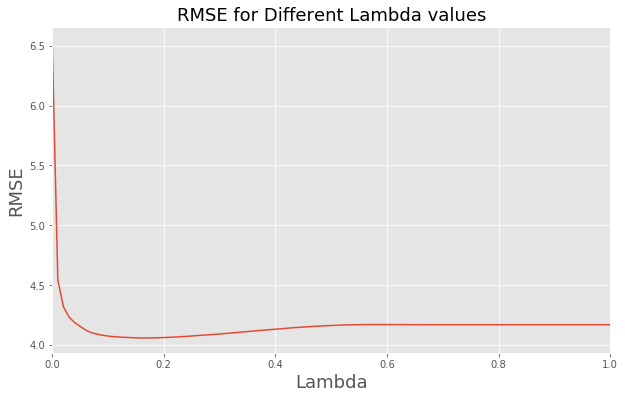

In [990]:
plt.figure(figsize=(10,6))
cv_Lasso.plot()
plt.xlabel("Lambda",size="18")
plt.ylabel("RMSE",size="18")
plt.title("RMSE for Different Lambda values",size="18")

In [991]:
cv_Lasso.min()

4.057578818906189

### Shrinkage effect on the Coefficients

In [1064]:
lasso_reg = Lasso(alpha=0)
lasso_reg.fit(Xs_train, Y_train)
lasso_df = pd.DataFrame({'variable': list(Xs_train.columns), 'estimate': list(lasso_reg.coef_)})

C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [1065]:
lasso_df.head()

,variable,estimate
0,m1,-0.548724
1,m2,0.020445
2,m3,0.023002
3,m4,0.020448
4,m5,0.020449


In [1066]:
alphas=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006]
#alphas = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1]
lasso_train_pred = []
#ridge_test_pred = []

# iterate lambdas
for alpha in alphas:
    # training
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(Xs_train, Y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = list(lasso_reg.coef_)
    # prediction
    lasso_train_pred.append(lasso_reg.predict(Xs_train))
    #ridge_test_pred.append(ridge_reg.predict(X_test))


C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.2588381507516, tolerance: 2.964633319696819
  positive)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541.7794826745629, tolerance: 2.964633319696819
  positive)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698.4776818105045, tolerance: 2.964633319696819
  positive)
C:\Users\re698843\AppData\Local\conda\conda\envs\myenv5\lib\site-packages\sklearn\linear_model\coordinate_descen

In [1067]:
#alphas

In [1069]:
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

In [1083]:
lasso_df

variable,1,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,estimate,-0.548724,0.020445,0.023002,0.020448,0.020449,0.023006,0.020451,0.020451,0.023009,...,-0.001988,-0.001265,-0.001265,0.009561,0.001912,5.518007e-19,5.518007e-19,5.518007e-19,5.518007e-19,4.414406e-19
1,estimate0.0001,-0.375690,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.008387,-0.007747,-0.007301,-0.000656,-0.000084,-4.000555e-19,-4.000555e-19,-4.000555e-19,-4.000555e-19,-4.000555e-19
2,estimate0.0002,-0.239452,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.014903,-0.014192,-0.014182,-0.003707,-0.000739,-3.338394e-18,-2.455513e-18,-2.014073e-18,-1.351912e-18,-1.241552e-18
3,estimate0.0003,-0.216076,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,estimate0.0004,-0.213003,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,estimate0.0005,-0.198586,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
6,estimate0.0006,-0.185838,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00


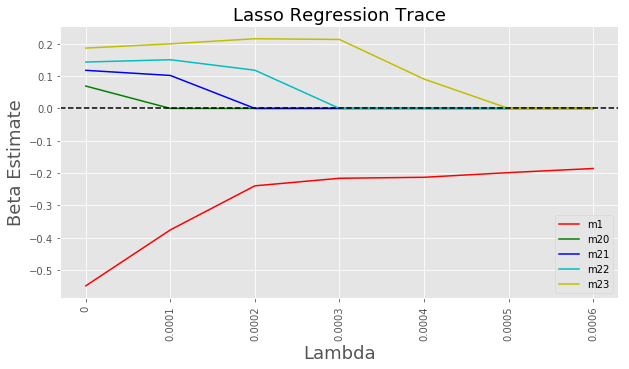

In [1084]:
alphas=[0,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.m1, 'r', lasso_df.m20, 'g', lasso_df.m21, 'b', lasso_df.m22, 'c', lasso_df.m23, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda",fontsize="18")
ax.set_ylabel("Beta Estimate",fontsize="18")
ax.set_xticklabels([""]+alphas)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title("Lasso Regression Trace", fontsize="18")
ax.legend(labels=['m1','m20','m21','m22','m23'])
plt.xticks(rotation='vertical')
ax.grid(True)

In [1085]:
#lasso_df

variable,1,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,estimate,-0.548724,0.020445,0.023002,0.020448,0.020449,0.023006,0.020451,0.020451,0.023009,...,-0.001988,-0.001265,-0.001265,0.009561,0.001912,5.518007e-19,5.518007e-19,5.518007e-19,5.518007e-19,4.414406e-19
1,estimate0.0001,-0.375690,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.008387,-0.007747,-0.007301,-0.000656,-0.000084,-4.000555e-19,-4.000555e-19,-4.000555e-19,-4.000555e-19,-4.000555e-19
2,estimate0.0002,-0.239452,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.014903,-0.014192,-0.014182,-0.003707,-0.000739,-3.338394e-18,-2.455513e-18,-2.014073e-18,-1.351912e-18,-1.241552e-18
3,estimate0.0003,-0.216076,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,estimate0.0004,-0.213003,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,estimate0.0005,-0.198586,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
6,estimate0.0006,-0.185838,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00


In [1025]:
lasso_list=pd.DataFrame(lasso_df.iloc[2])
#lasso_list

In [1028]:
lasso_list=pd.DataFrame(lasso_df.iloc[2])
lasso_list=lasso_list.drop(lasso_list.index[0])

Text(0.5,1,'Lasso Regression coefficients')

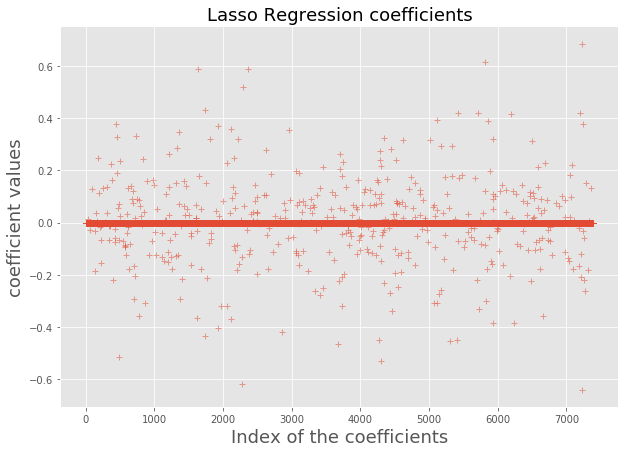

In [1031]:
plt.figure(figsize=(10,7))
plt.plot(list(lasso_list[2]),'+',alpha=0.5)
plt.xlabel("Index of the coefficients",size="18")
plt.ylabel("coefficient values",size="18")
plt.title("Lasso Regression coefficients",size="18")


## Principle Component Analysis

In [1041]:
Xs_train.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,1.043207,1.043247,1.043287,1.043319,1.043347,1.043374,1.043395,1.043412,1.043426,1.043637,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
4,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1042]:
from sklearn.decomposition import PCA as RandomizedPCA

In [1043]:
pca = RandomizedPCA(150)
pca.fit_transform(Xs_train)

array([[-3.04497794e+01,  1.76258306e+01, -7.44600483e+00, ...,
        -1.13284616e-01,  9.50645370e-01,  2.11438817e+00],
       [-2.45741474e+01, -9.27423842e+00, -1.89192979e+00, ...,
         1.61446322e+00,  1.68181266e+00, -2.43708754e+00],
       [-8.36169779e+00, -1.15322998e+01,  4.26620075e+01, ...,
        -1.03290215e+00,  1.34444102e+00,  3.21389018e-01],
       ...,
       [ 4.26305935e+00, -1.40090786e+01,  3.00477180e+01, ...,
         9.30620965e-01,  1.95383803e+00,  1.26201659e+00],
       [ 1.31108170e+01,  1.08801808e+01,  3.75759218e-01, ...,
         4.35366860e-01,  6.44301014e-03,  2.60944707e+00],
       [-7.08574882e+00,  8.56063169e+00,  3.36724424e+00, ...,
        -1.48736349e+00, -2.67717836e-01, -1.06885591e+00]])

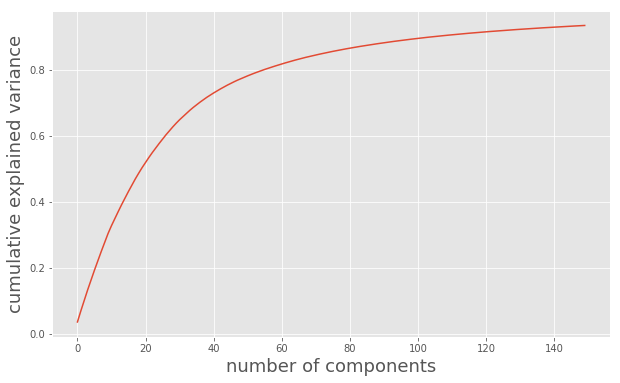

In [1044]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components',size="18")
plt.ylabel('cumulative explained variance',size="18");

In [1036]:
from sklearn.decomposition import PCA

In [1045]:
p_var = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
RMSE = []
#ridge_test_pred = []

# iterate lambdas
for var in p_var:
    # training
    pca = PCA(var)
    principal_components = pca.fit_transform(Xs_train)
    principal_df = pd.DataFrame(data = principal_components)
    # prediction
    lin_reg=LinearRegression()
    MSEs=cross_val_score(lin_reg,principal_df,Y_train,scoring='neg_mean_squared_error',cv=5)
    mean_RMSE=np.sqrt(np.mean(-MSEs))
    RMSE.append(mean_RMSE)
    #ridge_test_pred.append(ridge_reg.predict(X_test))

Text(0.5,1,'Linear Regression RMSE')

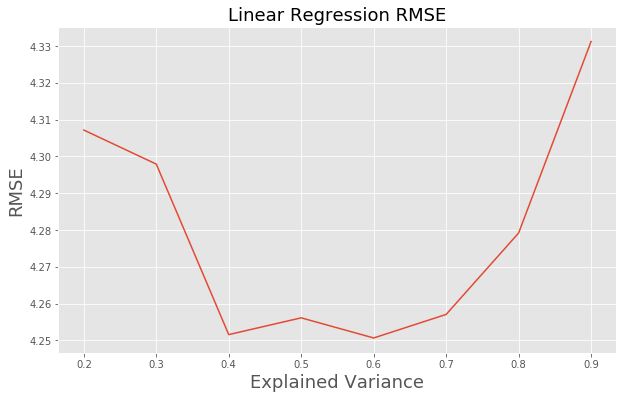

In [1040]:
plt.figure(figsize=(10,6))
plt.plot(p_var,RMSE)
plt.xlabel('Explained Variance',size="18")
plt.ylabel('RMSE',size="18")
plt.title('Linear Regression RMSE',size="18")

In [1056]:
min(RMSE)

4.25064575278694

In [1047]:
pca = PCA(0.60)
principal_components = pca.fit_transform(Xs_train)
principal_df = pd.DataFrame(data = principal_components)

In [1048]:
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-30.449779,17.625831,-7.446005,-8.147763,15.046638,-0.038258,-0.596379,-1.063919,15.487870,-16.690095,...,6.986218,1.650346,-2.317578,21.028115,1.661654,19.571695,-15.824522,9.158176,3.957734,-14.017262
1,-24.574147,-9.274238,-1.891930,2.290084,16.361925,-20.104757,-8.437445,-3.993263,-10.513237,-5.116630,...,-11.143298,5.431814,11.996291,1.849330,13.843988,-0.647718,14.632126,-4.345632,6.556052,-13.446177
2,-8.361698,-11.532300,42.662008,1.490734,2.446766,-10.823670,-34.192254,9.598676,2.054632,-17.908756,...,-8.804073,-10.115926,-19.110329,21.342579,12.824881,-7.519029,-4.377650,14.572060,2.425202,11.810738
3,1.296436,6.356759,-30.486155,-5.273382,12.338845,-20.093030,-4.213315,20.970582,-28.694858,-18.417219,...,20.688344,23.064059,-0.317523,-8.180464,5.188327,-14.998614,-0.984722,-4.390318,-19.104559,3.216217
4,7.386839,0.818478,-23.522222,4.955508,-3.137924,-19.543078,32.979877,-16.827570,-2.075873,-5.578802,...,4.491764,12.087594,21.435180,3.913183,11.318775,7.803727,4.119364,-1.707705,3.854075,13.805902


Text(0,0.5,'component_2')

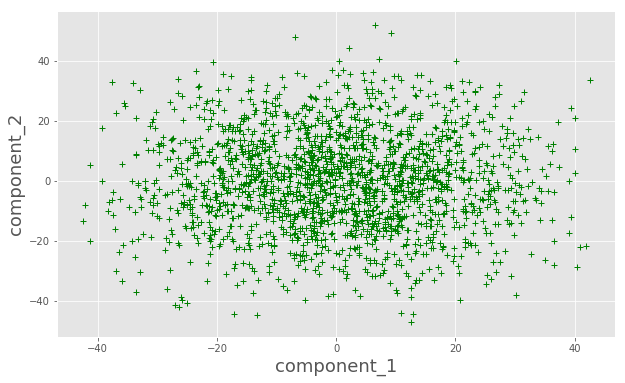

In [1049]:
plt.figure(figsize=(10,6))
plt.plot(principal_df[0],principal_df[1],'+',color='g')
plt.xlabel('component_1',size="18")
plt.ylabel('component_2',size="18")
#plt.title('Linear Regression RMSE',size="18")

## Ridge Regression with PCA

In [1050]:
Xs_train.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m7380,m7381,m7382,m7383,m7384,m7385,m7386,m7387,m7388,m7389
0,1.043207,1.043247,1.043287,1.043319,1.043347,1.043374,1.043395,1.043412,1.043426,1.043637,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.082043,2.081811,2.08151,2.081319,2.081275,2.081275,2.081275,2.081275,2.081275,2.081275
4,2.086414,2.086493,2.086573,2.086637,2.086693,2.086748,2.086789,2.086823,2.086853,2.087275,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1051]:
alphas = [0.2e5,0.5e5,1e5,1.25e5,1.5e5,2e5,2.5e5,3e5]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, principal_df, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

Text(0.5,1,'Ridge Regression with Priciple Components')

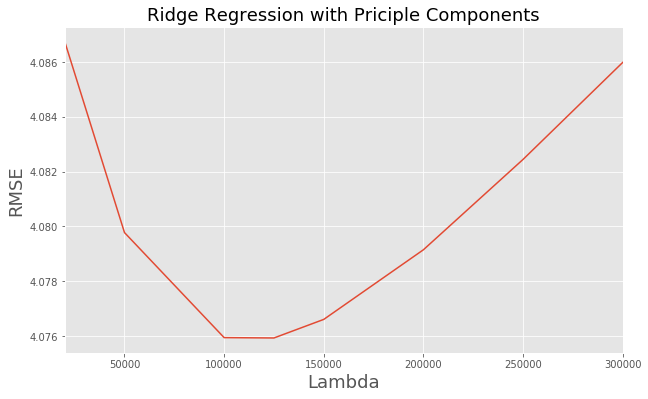

In [1052]:
plt.figure(figsize=(10,6))
cv_ridge.plot(title = "Validation")
plt.xlabel("Lambda",size="18")
plt.ylabel("RMSE",size="18")
plt.title("Ridge Regression with Priciple Components",size="18")

In [1053]:
cv_ridge.min()

4.075927233446773

In [1054]:
model=Ridge(alpha = 1e5).fit(principal_df, Y_train)